<a href="https://colab.research.google.com/github/rayssaz/DIO-projeto-Python-e-ML-com-dados-da-COVID-19/blob/main/Projeto_COVID_19_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><b>Projeto de Python e Machine Learning para prever a evolução do COVID-19 no Brasil.</b></center>

## <center>Digital Inovation ONE</center>
    As etapas de execução do projeto serão:
    1. Realizar a limpeza dos dados;
    2. Separar os dados que serão utilizados, criando um subset dos dados pertencentes ao Brasil;
    3. Visualizar os dados através dos gráficos 
    4. Realizar a Análise Exploratória dos Dados;
    5. Criar Modelos Preditivos.

In [ ]:
# Importando algumas bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re


In [ ]:
# Importando o dado utilizado para o projeto 
url = 'https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv'

In [ ]:
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [ ]:
# Verificando os tipos de cada coluna
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Para evitar problemas, nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais.

In [ ]:
# Criando uma função para corrigir os nomes das colunas
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [ ]:
# Vamos corrigir todas as colunas do dataframe
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brasil 

Vamos criar um subset para investigar apenas os dados do Brasil. 

In [ ]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


Selecionando as linhas onde há pelo menos um caso confirmado de Covid-19.

In [ ]:
brasil = df.loc[
    (df.countryregion == 'Brazil') &
    (df.confirmed > 0)
]
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Gráficos

## Casos Confirmados

In [ ]:
# Gráfico da evolução de casos confirmados
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

## Novos casos por dia

In [ ]:
# Técnica de programação funcional
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Visualizando o gráfico de novos casos de Covid
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

## Mortes

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
            mode = 'lines+markers', line={'color':'red'})
        )
# Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

## Taxa de Crescimento Médio

A taxa de crescimento é calculada por:

 <b> taxa_crescimento = (presente/passado)**(1/n)-1

In [ ]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data início for None, define como a primeira data disponível
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datatime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Define os valores do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

In [ ]:
# Taxa de crescimento médio do COVID no Brasil em todo o período
taxa_crescimento(brasil,'confirmed')

16.27183353112116

<b>A taxa de crescimento médio do Covid-19 por dia é 16%.

## Taxa de Crescimento Diário

In [ ]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
    # Se data início for None, define como a primeira data disponível
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datatime(data_inicio)
        
    data_fim = data.observationdate.max()
    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x:(data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100
    

In [ ]:
tx_dia = taxa_crescimento_diario(brasil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [ ]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
y=tx_dia, title='taxa de crescimento de casos confirmados no Brasil')

# Predições

Antes de modelar a série temporal, temos que realizar a decomposição para verificar a sua tendência, a sazonalidade e o ruído. 
Inicialmente, serão modelados os casos confirmados para compreender o crescimento do contágio.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
# Para realizar a decomposição, vamos criar um subset de casos confirmados para conseguir organizar as datas com o índice
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [ ]:
# Decomposição da série
res = seasonal_decompose(confirmados)

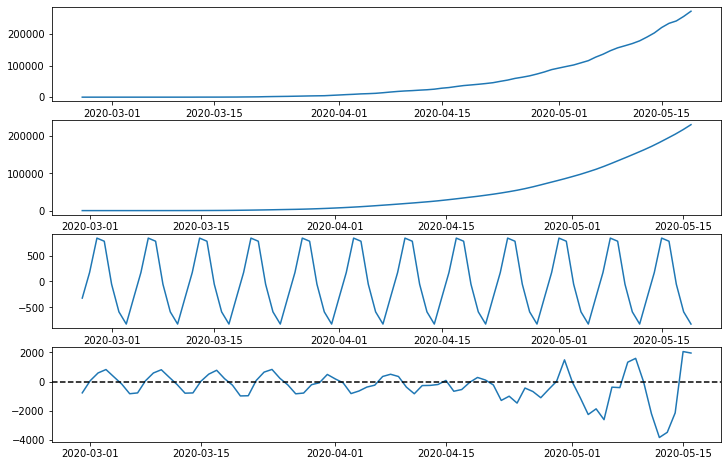

In [ ]:
# Definição da figura e das quatro linhas pertencentes as séries
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8))

ax1.plot(res.observed) # Observados
ax2.plot(res.trend)    # Tendência
ax3.plot(res.seasonal) # Sazonalidade da série
ax4.plot(confirmados.index, res.resid) # Ruído
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Modelagem dos Dados 


## Modelo ARIMA  
  O modelo <b>ARIMA</b> (Auto Regressivo Integrado de Média Móvel), conhecido também como metodologia de Box-Jenkins, é próprio para previsões
de séries temporais.  Os modelos ARIMA resultam da combinação de três componentes também denominados “filtros”: o componente Autoregressivo (AR), o filtro de Integração (I) e o componente de Médias Móveis (MA) (Fava, 2000b, p. 205).
A classe <b>ARIMA</b> do *pmdarima* permite a sazonalidade opcionalmente, enquanto que a classe ARIMA do statsmodels ainda não tem nenhum componente sazonal. Ambos os pacotes trabalham com previsão estatística. O pmdarima é essencialmente um wrapper Python & Cython (ou seja, tem um pouco de código C) de diversas bibliotecas estatísticas e de aprendizado de máquina (statsmodels e scikit-learn), e opera generalizando todos os modelos ARIMA em uma única classe (diferente de statsmodels). 

A função utilizada será a <b>"auto_arima"</b>, a qual realiza a verificação dos possíveis modelos gerados a partir da série temporal em questão, visando ao ajuste ideal.

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima 
modelo = auto_arima(confirmados)

In [ ]:
# Gráfico feito através do Graph Objects
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

# O predict_in_sample utiliza a série que foi aprendida para realizar a predição da série
# A expectativa é que a linha de observados e a linha de preditos estejam bem próximas uma da outra
fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

# Linha pertencente ao Forecast 
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()
    

# Modelo de Crescimento
<b> Objetivo: Prever quando a curva irá achatar e reduzir o número de casos

## Biblioteca Prophet
O Prophet implementa o algoritmo de previsão de séries temporais com base em um modelo aditivo em que as tendências não lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais com fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é eficiente ao lidar com dados ausentes, mudanças na tendência e outliers.

Ele foi programado para detectar automaticamente os padrões sazonais de uma série de input, sem precisar de ajustes manuais. Contudo, é possível customizar alguns inputs de parâmetros, como indicar a presença de períodos sazonais (semanal ou anual), feriados e changepoints.

<b>Fonte:</b> 
1. [Prophet | Forecasting at Scale](https://facebook.github.io/prophet/)
2. [Prophet vs forecast vs maf | IBPAD](https://ibpad.com.br/ciencia-dados/prophet-vs-forecast-vs-mafs-qual-o-melhor-pacote-para-series-temporais/#:~:text=Ele%20foi%20programado%20para%20detectar,descrito%20por%20inteiro%20neste%20paper.)



In [ ]:
!pip install pystan~=2.14
!pip install fbprophet


In [ ]:
from fbprophet import Prophet

In [ ]:
# Pré-processamentos
# Definir uma parte dos dados para treino e teste

train = confirmados.reset_index()[:-5] # Início até os cinco últimos
test = confirmados.reset_index()[-5:] # Os últimos cinco dias serão para teste

# Renomeando colunas
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace=True)

# Definir o modelo de crescimento
# Vamos usar Regressão Logística, visto que ela estima a função sigmóide
mod_cres = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25',
                                                   '2020-05-03', '2020-05-10'])

# Reproduzindo um cenário onde toda a população brasileira será contaminada
pop = 211463256
train['cap'] = pop

# Treina o modelo
mod_cres.fit(train)

# Construir previsões para o futuro
future_dates = mod_cres.make_future_dataframe(periods=200)
future_dates ['cap'] = pop
forecast = mod_cres.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Gráfico de Predição

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()